In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow matplotlib


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
os.environ["TF_USE_LEGACY_KERAS"] = "1"

def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Ensure 3 channels (RGB)
    image = tf.image.resize(image, [256, 256])  # Resize to 256x256
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    return image

# Utility function to load datasets
def load_dataset(directory):
    image_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.jpg')]
    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(lambda x: load_image(x))
    return dataset


In [ ]:
import zipfile

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/Rice_Leaf_AUG.zip'  # Update this path if necessary

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Rice_Leaf_AUG')  # Extract to a folder named 'Rice_Leaf_AUG'

print("Extraction complete.")

Extraction complete.


In [ ]:
import os

# Path to the extracted folder
extracted_folder = '/content/Rice_Leaf_AUG'

# List contents of the extracted folder
print("Files in extracted folder:", os.listdir(extracted_folder))

Files in extracted folder: ['Rice_Leaf_AUG']


In [ ]:
import os

# Path to the extracted folder
extracted_folder = '/content/Rice_Leaf_AUG'

# Recursively detect all subfolders
subfolders = []
for root, dirs, files in os.walk(extracted_folder):
    for dir_name in dirs:
        subfolders.append(os.path.join(root, dir_name))

# Print detected subfolders
print("Detected subfolders:", subfolders)

Detected subfolders: ['/content/Rice_Leaf_AUG/Rice_Leaf_AUG', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Sheath Blight', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Leaf scald', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Brown Spot', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Neck_Blast', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Narrow Brown Leaf Spot', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Healthy Rice Leaf', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Bacterial Leaf Blight', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Rice Hispa', '/content/Rice_Leaf_AUG/Rice_Leaf_AUG/Leaf Blast']


In [ ]:
import os

# Base dataset path
base_path = '/content/Rice_Leaf_AUG/Rice_Leaf_AUG'

# Define paths for each disease folder
leaf_blast_path = os.path.join(base_path, 'Leaf Blast/')
healthy_rice_leaf_path = os.path.join(base_path, 'Healthy Rice Leaf/')
rice_hispa_path = os.path.join(base_path, 'Rice Hispa/')
leaf_scald_path = os.path.join(base_path, 'Leaf scald/')
bacterial_leaf_blight_path = os.path.join(base_path, 'Bacterial Leaf Blight/')
sheath_blight_path = os.path.join(base_path, 'Sheath Blight/')
neck_blast_path = os.path.join(base_path, 'Neck_Blast/')
brown_spot_path = os.path.join(base_path, 'Brown Spot/')
narrow_brown_leaf_spot_path = os.path.join(base_path, 'Narrow Brown Leaf Spot/')

# Print paths for verification
print("Leaf Blast Path:", leaf_blast_path)
print("Healthy Rice Leaf Path:", healthy_rice_leaf_path)
print("Rice Hispa Path:", rice_hispa_path)
print("Leaf Scald Path:", leaf_scald_path)
print("Bacterial Leaf Blight Path:", bacterial_leaf_blight_path)
print("Sheath Blight Path:", sheath_blight_path)
print("Neck Blast Path:", neck_blast_path)
print("Brown Spot Path:", brown_spot_path)
print("Narrow Brown Leaf Spot Path:", narrow_brown_leaf_spot_path)

Leaf Blast Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Leaf Blast/
Healthy Rice Leaf Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Healthy Rice Leaf/
Rice Hispa Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Rice Hispa/
Leaf Scald Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Leaf scald/
Bacterial Leaf Blight Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Bacterial Leaf Blight/
Sheath Blight Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Sheath Blight/
Neck Blast Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Neck_Blast/
Brown Spot Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Brown Spot/
Narrow Brown Leaf Spot Path: /content/Rice_Leaf_AUG/Rice_Leaf_AUG/Narrow Brown Leaf Spot/


In [ ]:
#Load datasets for each disease folder
leaf_blast_images = load_dataset(leaf_blast_path)
healthy_rice_leaf_images = load_dataset(healthy_rice_leaf_path)
rice_hispa_images = load_dataset(rice_hispa_path)
leaf_scald_images = load_dataset(leaf_scald_path)
bacterial_leaf_blight_images = load_dataset(bacterial_leaf_blight_path)
sheath_blight_images = load_dataset(sheath_blight_path)
neck_blast_images = load_dataset(neck_blast_path)
brown_spot_images = load_dataset(brown_spot_path)
narrow_brown_leaf_spot_images = load_dataset(narrow_brown_leaf_spot_path)

In [ ]:
def build_generator():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])  # Input shape: (256, 256, 3)
    x = tf.keras.layers.Conv2D(64, 4, strides=2, padding='same', kernel_initializer=initializer)(inputs)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2D(128, 4, strides=2, padding='same', kernel_initializer=initializer)(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2DTranspose(64, 4, strides=2, padding='same', kernel_initializer=initializer)(x)
    x = tf.keras.layers.ReLU()(x)
    outputs = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh', kernel_initializer=initializer)(x)
    return tf.keras.Model(inputs, outputs)

In [ ]:
def build_discriminator():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])  # Input shape: (256, 256, 3)
    x = tf.keras.layers.Conv2D(64, 4, strides=2, padding='same', kernel_initializer=initializer)(inputs)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2D(128, 4, strides=2, padding='same', kernel_initializer=initializer)(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(1)(x)
    return tf.keras.Model(inputs, outputs)

In [ ]:
# Loss functions
def discriminator_loss(real, fake):
    real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(real), logits=real))
    fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(fake), logits=fake))
    return real_loss + fake_loss

def generator_loss(fake):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(fake), logits=fake))

def cycle_consistency_loss(real_image, cycled_image):
    return tf.reduce_mean(tf.abs(real_image - cycled_image))

def identity_loss(real_image, same_image):
    return tf.reduce_mean(tf.abs(real_image - same_image))

In [ ]:
# Create models
generator_X_to_Y = build_generator()
generator_Y_to_X = build_generator()
discriminator_X = build_discriminator()
discriminator_Y = build_discriminator()

/usr/local/lib/python3.11/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

In [ ]:
# Training step
@tf.function
def train_step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        # Generate fake images
        fake_y = generator_X_to_Y(real_x)
        fake_x = generator_Y_to_X(real_y)

        # Cycle Consistency Loss
        cycled_x = generator_Y_to_X(fake_y)
        cycled_y = generator_X_to_Y(fake_x)

        # Identity Loss
        same_x = generator_Y_to_X(real_x)
        same_y = generator_X_to_Y(real_y)

        # Discriminator outputs
        disc_x_real = discriminator_X(real_x)
        disc_x_fake = discriminator_X(fake_x)
        disc_y_real = discriminator_Y(real_y)
        disc_y_fake = discriminator_Y(fake_y)

        # Loss calculations
        disc_loss_X = discriminator_loss(disc_x_real, disc_x_fake)
        disc_loss_Y = discriminator_loss(disc_y_real, disc_y_fake)

        gen_loss_X_to_Y = generator_loss(disc_y_fake)
        gen_loss_Y_to_X = generator_loss(disc_x_fake)

        cycle_loss = cycle_consistency_loss(real_x, cycled_x) + cycle_consistency_loss(real_y, cycled_y)
        identity_loss_X = identity_loss(real_x, same_x)
        identity_loss_Y = identity_loss(real_y, same_y)

        total_gen_loss = gen_loss_X_to_Y + gen_loss_Y_to_X + 10 * cycle_loss + 5 * identity_loss_X + 5 * identity_loss_Y
        total_disc_loss = disc_loss_X + disc_loss_Y

    # Gradients and optimization
    generator_X_to_Y_gradients = tape.gradient(total_gen_loss, generator_X_to_Y.trainable_variables)
    generator_Y_to_X_gradients = tape.gradient(total_gen_loss, generator_Y_to_X.trainable_variables)
    discriminator_X_gradients = tape.gradient(total_disc_loss, discriminator_X.trainable_variables)
    discriminator_Y_gradients = tape.gradient(total_disc_loss, discriminator_Y.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_X_to_Y_gradients, generator_X_to_Y.trainable_variables))
    generator_optimizer.apply_gradients(zip(generator_Y_to_X_gradients, generator_Y_to_X.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_X_gradients, discriminator_X.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_Y_gradients, discriminator_Y.trainable_variables))


In [ ]:
import tensorflow as tf
import os
from IPython.display import clear_output # Import clear_output
import matplotlib.pyplot as plt
import numpy as np
EPOCHS = 10
disease_pairs = [
    (leaf_blast_images, healthy_rice_leaf_images),
    (leaf_blast_images, rice_hispa_images),
    (leaf_blast_images, leaf_scald_images),
    (leaf_blast_images, bacterial_leaf_blight_images),
    (leaf_blast_images, sheath_blight_images),
    (leaf_blast_images, neck_blast_images),
    (leaf_blast_images, brown_spot_images),
    (leaf_blast_images, narrow_brown_leaf_spot_images),
    (healthy_rice_leaf_images, rice_hispa_images),
    (healthy_rice_leaf_images, leaf_scald_images),
    (healthy_rice_leaf_images, bacterial_leaf_blight_images),
    (healthy_rice_leaf_images, sheath_blight_images),
    (healthy_rice_leaf_images, neck_blast_images),
    (healthy_rice_leaf_images, brown_spot_images),
    (healthy_rice_leaf_images, narrow_brown_leaf_spot_images),
    (rice_hispa_images, leaf_scald_images),
    (rice_hispa_images, bacterial_leaf_blight_images),
    (rice_hispa_images, sheath_blight_images),
    (rice_hispa_images, neck_blast_images),
    (rice_hispa_images, brown_spot_images),
    (rice_hispa_images, narrow_brown_leaf_spot_images),
    (leaf_scald_images, bacterial_leaf_blight_images),
    (leaf_scald_images, sheath_blight_images),
    (leaf_scald_images, neck_blast_images),
    (leaf_scald_images, brown_spot_images),
    (leaf_scald_images, narrow_brown_leaf_spot_images),
    (bacterial_leaf_blight_images, sheath_blight_images),
    (bacterial_leaf_blight_images, neck_blast_images),
    (bacterial_leaf_blight_images, brown_spot_images),
    (bacterial_leaf_blight_images, narrow_brown_leaf_spot_images),
    (sheath_blight_images, neck_blast_images),
    (sheath_blight_images, brown_spot_images),
    (sheath_blight_images, narrow_brown_leaf_spot_images),
    (neck_blast_images, brown_spot_images),
    (neck_blast_images, narrow_brown_leaf_spot_images),
    (brown_spot_images, narrow_brown_leaf_spot_images)
]

# Create generator and discriminator models before the training loop
generator_X_to_Y = build_generator()
generator_Y_to_X = build_generator()
discriminator_X = build_discriminator()
discriminator_Y = build_discriminator()

# Create optimizers after creating the models
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Build the optimizers with the full list of trainable variables
generator_optimizer.build(generator_X_to_Y.trainable_variables + generator_Y_to_X.trainable_variables)
discriminator_optimizer.build(discriminator_X.trainable_variables + discriminator_Y.trainable_variables)

@tf.function
def train_step(real_x, real_y, generator_X_to_Y, generator_Y_to_X, discriminator_X, discriminator_Y):
    with tf.GradientTape(persistent=True) as tape:
        # Generate fake images
        fake_y = generator_X_to_Y(real_x, training=True)
        fake_x = generator_Y_to_X(real_y, training=True)

        # Cycle Consistency Loss
        cycled_x = generator_Y_to_X(fake_y, training=True)
        cycled_y = generator_X_to_Y(fake_x, training=True)

        # Identity Loss
        same_x = generator_Y_to_X(real_x, training=True)
        same_y = generator_X_to_Y(real_y, training=True)

        # Calculate the losses
        disc_x_real = discriminator_X(real_x, training=True)
        disc_x_fake = discriminator_X(fake_x, training=True)
        disc_y_real = discriminator_Y(real_y, training=True)
        disc_y_fake = discriminator_Y(fake_y, training=True)

        disc_loss_X = discriminator_loss(disc_x_real, disc_x_fake)
        disc_loss_Y = discriminator_loss(disc_y_real, disc_y_fake)

        gen_loss_X_to_Y = generator_loss(disc_y_fake)
        gen_loss_Y_to_X = generator_loss(disc_x_fake)

        cycle_loss = cycle_consistency_loss(real_x, cycled_x) + cycle_consistency_loss(real_y, cycled_y)
        identity_loss_X = identity_loss(real_x, same_x)
        identity_loss_Y = identity_loss(real_y, same_y)

        total_gen_loss = gen_loss_X_to_Y + gen_loss_Y_to_X + 10 * cycle_loss + 5 * identity_loss_X + 5 * identity_loss_Y
        total_disc_loss = disc_loss_X + disc_loss_Y

    # Calculate gradients and apply them
    generator_X_to_Y_gradients = tape.gradient(total_gen_loss, generator_X_to_Y.trainable_variables)
    generator_Y_to_X_gradients = tape.gradient(total_gen_loss, generator_Y_to_X.trainable_variables)
    discriminator_X_gradients = tape.gradient(total_disc_loss, discriminator_X.trainable_variables)
    discriminator_Y_gradients = tape.gradient(total_disc_loss, discriminator_Y.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_X_to_Y_gradients, generator_X_to_Y.trainable_variables))
    generator_optimizer.apply_gradients(zip(generator_Y_to_X_gradients, generator_Y_to_X.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_X_gradients, discriminator_X.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_Y_gradients, discriminator_Y.trainable_variables))

    return total_gen_loss, total_disc_loss

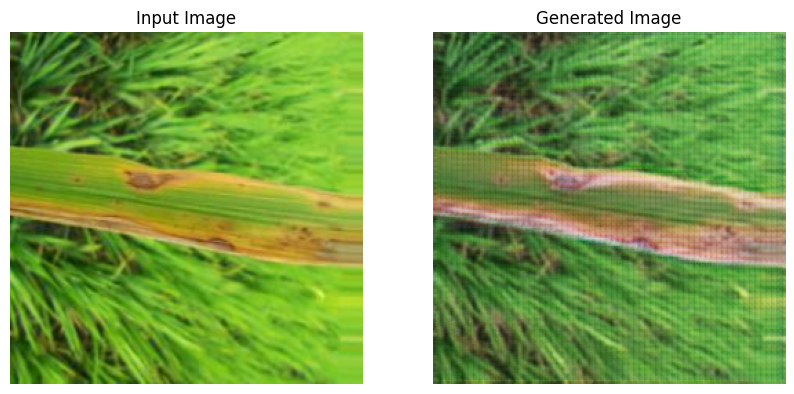

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Training loop
for epoch in range(EPOCHS):
    for real_x, real_y in disease_pairs:
        for i, (img_x, img_y) in enumerate(zip(real_x, real_y)):
            # Ensure the input tensors have the correct shape (1, 256, 256, 3)
            if len(img_x.shape) == 3:  # If the image has shape (256, 256, 3)
                img_x = tf.expand_dims(img_x, axis=0)  # Add batch dimension: (1, 256, 256, 3)
            if len(img_y.shape) == 3:  # If the image has shape (256, 256, 3)
                img_y = tf.expand_dims(img_y, axis=0)  # Add batch dimension: (1, 256, 256, 3)

            # Train step
            train_step(img_x, img_y, generator_X_to_Y, generator_Y_to_X, discriminator_X, discriminator_Y)

            # Visualization
            if i % 10 == 0:
                clear_output(wait=True)
                sample_image_x = img_x  # Shape: (1, 256, 256, 3)
                generated_image_y = generator_X_to_Y(sample_image_x, training=False)  # Shape: (1, 256, 256, 3)

                # Display input and generated images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(np.clip((sample_image_x[0].numpy() + 1) / 2, 0, 1))  # Input image
                plt.title("Input Image")
                plt.axis("off")

                plt.subplot(1, 2, 2)
                plt.imshow(np.clip((generated_image_y[0].numpy() + 1) / 2, 0, 1))  # Generated image
                plt.title("Generated Image")
                plt.axis("off")

                plt.show()

    print(f"Epoch {epoch + 1}/{EPOCHS} completed.")

In [ ]:
generator_X_to_Y.save('generator_X_to_Y')
generator_Y_to_X.save('generator_Y_to_X')
